# Predicción de abandono del servicio en Telecom X

## Preparación de los datos

In [1]:
import pandas as pd

In [2]:
path = 'datos/datos_tratados.csv'
df = pd.read_csv(path)
df.sample(5)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal
5865,8242-SOQUO,No,Female,Yes,No,No,5,Yes,No,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,2.82,84.70,392.50
4699,6624-JDRDS,No,Female,No,No,No,6,No,No,DSL,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),0.98,29.45,161.45
1814,2649-HWLYB,No,Male,No,Yes,No,65,Yes,Yes,DSL,...,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),2.54,76.15,4929.55
5844,8219-VYBVI,No,Male,No,No,Yes,39,Yes,Yes,No,...,No,No,No,No,Two year,No,Mailed check,0.83,25.00,1004.35
4756,6695-AMZUF,No,Female,No,Yes,No,70,Yes,No,DSL,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),2.88,86.45,5950.20


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   str    
 1   Churn             7043 non-null   str    
 2   Gender            7043 non-null   str    
 3   SeniorCitizen     7043 non-null   str    
 4   Partner           7043 non-null   str    
 5   Dependents        7043 non-null   str    
 6   Tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   str    
 8   MultipleLines     7043 non-null   str    
 9   InternetService   7043 non-null   str    
 10  OnlineSecurity    7043 non-null   str    
 11  OnlineBackup      7043 non-null   str    
 12  DeviceProtection  7043 non-null   str    
 13  TechSupport       7043 non-null   str    
 14  StreamingTV       7043 non-null   str    
 15  StreamingMovies   7043 non-null   str    
 16  Contract          7043 non-null   str    
 17  Paperl

In [4]:
df = df.drop(columns=['CustomerID'])

In [5]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [6]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [7]:
categorical_features = df.columns.drop(['Churn', 'Tenure', 'ChargesDaily', 'ChargesMonthly', 'ChargesTotal'])

one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), categorical_features),
    remainder='passthrough', sparse_threshold=0
)

In [8]:
X = one_hot.fit_transform(X)
X

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 2.19000e+00,
        6.56000e+01, 5.93300e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.00000e+00,
        5.99000e+01, 5.42400e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.46000e+00,
        7.39000e+01, 2.80850e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.68000e+00,
        5.03000e+01, 9.27500e+01],
       [1.00000e+00, 0.00000e+00, 1.00000e+00, ..., 2.26000e+00,
        6.78500e+01, 4.62765e+03],
       [1.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.97000e+00,
        5.90000e+01, 3.70760e+03]], shape=(7043, 27))

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [11]:
print(f'Existe una proporción de {y.mean()*100:.2f}% de clientes que abandonaron el servicio.')

Existe una proporción de 26.54% de clientes que abandonaron el servicio.


In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [13]:
pipeline_us = imbpipeline(steps=[
    ('under', NearMiss(version=3)),
    ('model', DecisionTreeClassifier(max_depth=10, random_state=42))
])
pipeline_os = imbpipeline(steps=[
    ('over', SMOTE()),
    ('model', DecisionTreeClassifier(max_depth=10, random_state=42))
])

In [14]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results_us = cross_val_score(pipeline_us, X, y, cv=skf, scoring='recall')
cv_results_os = cross_val_score(pipeline_os, X, y, cv=skf, scoring='recall')

In [15]:
print(f'El recall del Under Sampling es {cv_results_us.mean():.4f}')
print(f'El recall del Over Sampling es {cv_results_os.mean():.4f}')

El recall del Under Sampling es 0.6645
El recall del Over Sampling es 0.5559


In [16]:
under_sample = NearMiss(version=3)
X_balanceado, y_balanceado = under_sample.fit_resample(X, y)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()
X_normalizado = scaler.fit_transform(X_balanceado)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

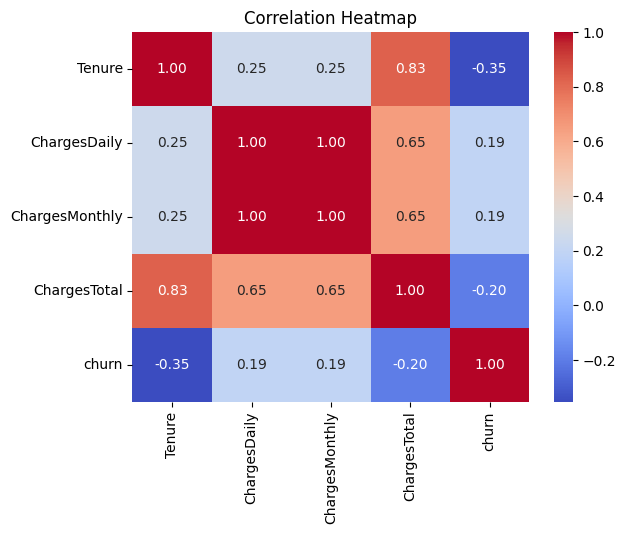

In [20]:
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure()
sns.heatmap(pd.concat([df[columnas_numericas], pd.DataFrame(y, columns=['churn'])], axis=1).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

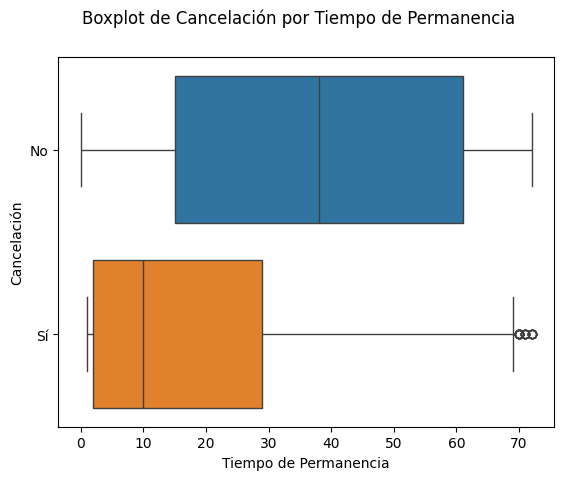

In [21]:
fig = plt.figure()
sns.boxplot(data=df, y='Churn', x='Tenure', hue='Churn')
fig.suptitle('Boxplot de Cancelación por Tiempo de Permanencia')
fig.axes[0].set_xlabel('Tiempo de Permanencia')
fig.axes[0].set_ylabel('Cancelación')
fig.axes[0].set_yticks([0, 1], labels=['No', 'Sí'])
plt.show()

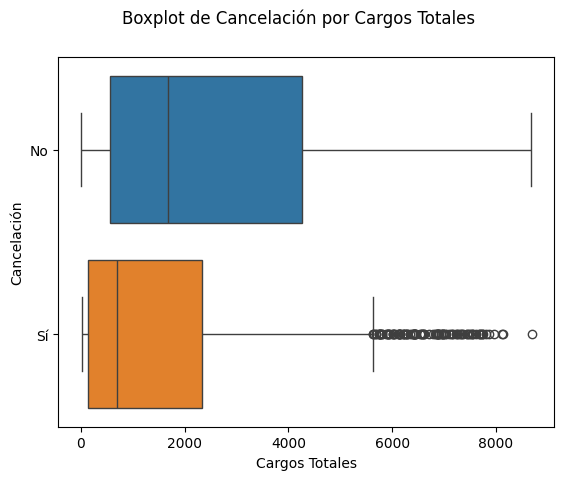

In [22]:
fig = plt.figure()
sns.boxplot(data=df, y='Churn', x='ChargesTotal', hue='Churn')
fig.suptitle('Boxplot de Cancelación por Cargos Totales')
fig.axes[0].set_xlabel('Cargos Totales')
fig.axes[0].set_ylabel('Cancelación')
fig.axes[0].set_yticks([0, 1], labels=['No', 'Sí'])
plt.show()

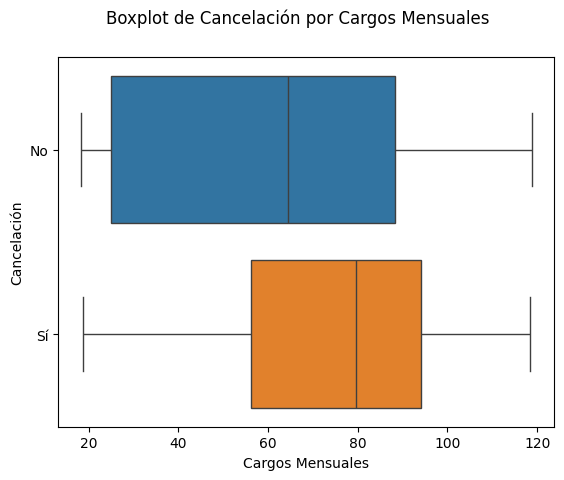

In [23]:
fig = plt.figure()
sns.boxplot(data=df, y='Churn', x='ChargesMonthly', hue='Churn')
fig.suptitle('Boxplot de Cancelación por Cargos Mensuales')
fig.axes[0].set_xlabel('Cargos Mensuales')
fig.axes[0].set_ylabel('Cancelación')
fig.axes[0].set_yticks([0, 1], labels=['No', 'Sí'])
plt.show()

In [24]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [25]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [26]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


In [27]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
}
baseline = DummyClassifier(strategy="most_frequent")
cv_baseline = cross_validate(baseline, X_balanceado, y_balanceado, cv=cv, scoring=scoring)

modelo_lr = LogisticRegression(max_iter=1000, random_state=42)
cv_lr = cross_validate(modelo_lr, X_normalizado, y_balanceado, cv=cv, scoring=scoring)

modelo_dt = DecisionTreeClassifier(max_depth=10, random_state=42)
cv_dt = cross_validate(modelo_dt, X_balanceado, y_balanceado, cv=cv, scoring=scoring)

modelo_rf = RandomForestClassifier(random_state=42)
cv_rf = cross_validate(modelo_rf, X_balanceado, y_balanceado, cv=cv, scoring=scoring)

modelo_svc = SVC(random_state=42)
cv_svc = cross_validate(modelo_svc, X_normalizado, y_balanceado, cv=cv, scoring=scoring)

modelo_mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=(64,32), early_stopping=True, random_state=42)
cv_mlp = cross_validate(modelo_mlp, X_normalizado, y_balanceado, cv=cv, scoring=scoring)

modelo_xgb = XGBClassifier(eval_metric='logloss', random_state=42)
cv_xgb = cross_validate(modelo_xgb, X_balanceado, y_balanceado, cv=cv, scoring=scoring)

c:\Users\isaia\OneDrive\Certificaciones\Oracle Next Education\Estadistica y ML\Challenge Telecom X - Parte 2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\isaia\OneDrive\Certificaciones\Oracle Next Education\Estadistica y ML\Challenge Telecom X - Parte 2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\isaia\OneDrive\Certificaciones\Oracle Next Education\Estadistica y ML\Challenge Telecom X - Parte 2\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWa

In [28]:
import numpy as np

In [29]:
resultados = {
    'Baseline': cv_baseline,
    'LogReg': cv_lr,
    'DecisionTree': cv_dt,
    'RandomForest': cv_rf,
    'SVC': cv_svc,
    'MLP': cv_mlp,
    'XGBoost': cv_xgb
}

filas = []
for nombre, cv_res in resultados.items():
    filas.append({
        'Modelo': nombre,
        'Recall': np.mean(cv_res['test_recall']),
        'F1': np.mean(cv_res['test_f1']),
        'Accuracy': np.mean(cv_res['test_accuracy']),
        'Precision': np.mean(cv_res['test_precision'])
    })

df_resultados = pd.DataFrame(filas).sort_values(by='Recall', ascending=False)
print('Métricas con los datos de entrenamiento:')
df_resultados

Métricas con los datos de entrenamiento:


,Modelo,Recall,F1,Accuracy,Precision
1,LogReg,0.756022,0.713025,0.695554,0.674820
4,SVC,0.751743,0.710277,0.693143,0.673613
5,MLP,0.732503,0.697005,0.681912,0.666035
6,XGBoost,0.665596,0.674444,0.678965,0.684075
3,RandomForest,0.659191,0.684564,0.696629,0.712826
2,DecisionTree,0.644199,0.654079,0.659440,0.665289
0,Baseline,0.200000,0.133214,0.499732,0.099866


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Usamos make_pipeline para asegurar que el escalado se haga correctamente
modelos = {
    'LogReg': make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=1000, random_state=42)),
    'SVC': make_pipeline(MinMaxScaler(), SVC(random_state=42)),
    'MLP': make_pipeline(MinMaxScaler(), MLPClassifier(max_iter=1000, hidden_layer_sizes=(64,32), early_stopping=True, random_state=42))
}

resultados_validacion = []

X_temp, X_val, y_temp, y_val = train_test_split(X_balanceado, y_balanceado, test_size=0.05, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

for nombre, modelo in modelos.items():
    # Entrenar el modelo con los datos de entrenamiento
    modelo.fit(X_train, y_train)
    
    y_pred = modelo.predict(X_val)
    
    resultados_validacion.append({
        'Modelo': nombre,
        'Recall': recall_score(y_val, y_pred),
        'F1': f1_score(y_val, y_pred),
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred)
    })

df_validacion = pd.DataFrame(resultados_validacion).sort_values(by='Recall', ascending=False).reset_index(drop=True)

print("Resultados en Datos de Validación:")
df_validacion

Entrenando modelos y evaluando en el conjunto de validación...

Resultados en Datos de Validación (Unseen Data):


,Modelo,Recall,F1,Accuracy,Precision
0,LogReg,0.739837,0.713725,0.691983,0.689394
1,SVC,0.701897,0.691589,0.675105,0.681579
2,MLP,0.701897,0.701897,0.690577,0.701897
